In [1]:
import random
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import product
from specs import * 
from math import e

In [2]:
random.seed(42)

## create trials

In [ ]:
n_red = [1,2,3,4] * 5
outcome = (1, -1)

# all possible trial parameters
trial_params = pd.DataFrame(product(n_red, outcome), columns=['n_red', 'outcome'])

In [ ]:
len(trial_params)

In [ ]:
trial_params

In [ ]:
trial_params = trial_params.sample(frac=1).reset_index(drop=True)

In [ ]:
trial_params.to_json(path_or_buf="trials.json", orient="index")

## import trials

In [62]:
import json

with open("C:/Users/Sarah Zheng/dev/cards-deception/cards-game/src/assets/trials_40shuffled.json", "r") as read_file:
    trials_source = json.load(read_file)

In [63]:
trials = []
for trial in trials_source:
    trials.append(Trial(n_red=trial['n_red'], outcome=trial['outcome']))

In [64]:
len(trials)

40

## create player

In [69]:
# random player simulation
player = Player(alpha=0.1, beta=4)

## simulate game with imported trials

In [70]:
g = Game(trials, player)

In [71]:
g.simulate(verbose=True)

starting game play simulation
player attributes: bias:  0 alpha:  0.1 beta: 4
trial:  1
suspicion_t: 0
# red cards:  1
randomly picked card for player:  1
opponent card: red
You win 1 point
You lose 1 point
change in suspicion:  0.08000000000000002
new player suspicion:  -0.08000000000000002 

number of trials with given n_red: 1
probability of suspicion rating:  1.0
trial:  2
suspicion_t: -0.08000000000000002
# red cards:  3
randomly picked card for player:  1
opponent card: red
You win 1 point
You lose 1 point
change in suspicion:  0.04000000000000001
new player suspicion:  -0.12000000000000002 

number of trials with given n_red: 1
probability of suspicion rating:  1.0
trial:  3
suspicion_t: -0.12000000000000002
# red cards:  2
randomly picked card for player:  1
opponent card: blue
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
change in suspicion:  0.04000000000000001
new player suspicion:  -0.08000000000000002 

number of trials with given n_red

In [72]:
df = pd.DataFrame(g.sim_log)

In [73]:
df

,index,n_red,n_blue,opponent_card,expectation,exp_violation,learning_rate,beta_noise,bias,suspicion_tmin1,suspicion_t,delta_suspicion,random_pick,played_card,player_reward,opponent_reward,softmax_probability
0,1,1,4,-1,-0.2,-0.8,0.1,4,0,0.000000e+00,-8.000000e-02,0.08,1,1,1,-1,1.000000
1,2,3,2,-1,-0.6,-0.4,0.1,4,0,-8.000000e-02,-1.200000e-01,0.04,1,1,1,-1,1.000000
2,3,2,3,1,0.6,0.4,0.1,4,0,-1.200000e-01,-8.000000e-02,0.04,1,1,0,0,1.000000
3,4,1,4,-1,-0.2,-0.8,0.1,4,0,-8.000000e-02,-1.600000e-01,0.08,1,1,1,-1,0.420676
4,5,2,3,-1,-0.4,-0.6,0.1,4,0,-1.600000e-01,-2.200000e-01,0.06,1,1,1,-1,0.363547
5,6,1,4,-1,-0.2,-0.8,0.1,4,0,-2.200000e-01,-3.000000e-01,0.08,-1,-1,0,0,0.193739
6,7,2,3,1,0.6,0.4,0.1,4,0,-3.000000e-01,-2.600000e-01,0.04,1,1,0,0,0.236522
7,8,2,3,-1,-0.4,-0.6,0.1,4,0,-2.600000e-01,-3.200000e-01,0.06,-1,-1,0,0,0.156868
8,9,1,4,-1,-0.2,-0.8,0.1,4,0,-3.200000e-01,-4.000000e-01,0.08,1,1,1,-1,0.114940
9,10,3,2,-1,-0.6,-0.4,0.1,4,0,-4.000000e-01,-4.400000e-01,0.04,1,1,1,-1,0.217550


In [74]:
# 1. transform estimated suspicion values to range spanning 7 standard deviations || standardize to range 0,1
# 2. array of honesty rating values where each value is 1 standard deviation? || standardize to range 0,1
# 3. compute difference between standardized suspicion value estimations & standardized actual honesty ratings
# 4. find best fitting alpha value that minimizes this difference

df['normalized_suspicions'] = [(v-min(df.suspicion_t))/(max(df.suspicion_t)-min(df.suspicion_t)) for v in df.suspicion_t.values]

[Text(0.5, 0, 'trial'), Text(0, 0.5, 'p(deception)')]

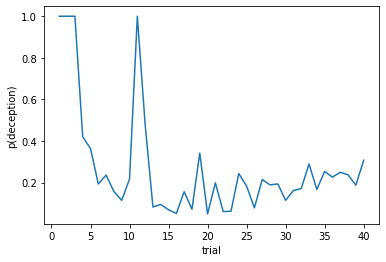

In [75]:
sns.lineplot(data=df, x='index', y='softmax_probability').set(xlabel="trial", ylabel="p(deception)")

[Text(0.5, 0, 'normalized suspicion value'), Text(0, 0.5, 'p(deception)')]

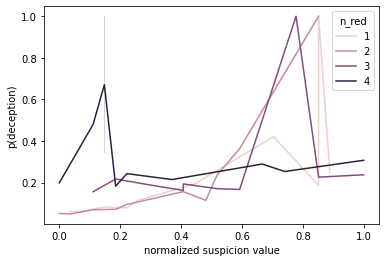

In [76]:
sns.lineplot(data=df, x='normalized_suspicions', y='softmax_probability', hue='n_red').set(xlabel="normalized suspicion value", ylabel="p(deception)")

[Text(0.5, 0, '# red cards'), Text(0, 0.5, 'p(deception)')]

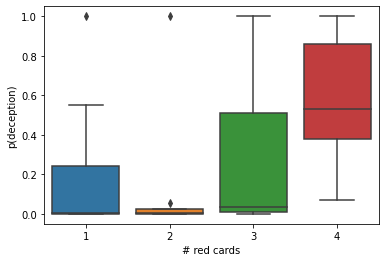

In [14]:
sns.boxplot(data=df, x='n_red', y='softmax_probability').set(xlabel="# red cards", ylabel="p(deception)")

[Text(0.5, 0, 'level of expectation violation'), Text(0, 0.5, 'p(deception)')]

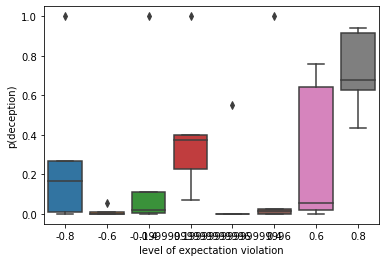

In [15]:
sns.boxplot(data=df, x='exp_violation', y='softmax_probability').set(xlabel="level of expectation violation", ylabel="p(deception)")

In [ ]:
from scipy.interpolate import interp1d

# TODO: interpolate honesty ratings to range of suspicion values


## parameter recovery from simulated data

In [77]:
# parameter search space
alpha = np.linspace(0,1,11)
beta = np.linspace(-10,10,21)
params = tuple(product(alpha, beta))
trials = trials

x0 = [0.2, 1] # starting point (guess)

In [79]:
beta

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [80]:
sse = []

def param_recovery_proba(x, params):
    for param in params:
        player = Player(alpha=param[0], beta=param[1])
        g = Game(trials, player)
        g.simulate(verbose=False)
        ps = np.array(g.softmax_probabilities)
        sse.append(sum((x-ps)**2))
    minimum_idx = np.where(sse == np.amin(sse))[0][0]
    print("BEST PARAMETER ESTIMATES:", params[minimum_idx])

In [ ]:
# evaluate 

In [81]:
param_recovery_proba(df.softmax_probability.values, params)

starting game play simulation
player attributes: bias:  0 alpha:  0.0 beta: -10.0
trial:  1
You win 1 point
You lose 1 point
number of trials with given n_red: 1
trial:  2
You win 1 point
You lose 1 point
number of trials with given n_red: 1
trial:  3
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 1
trial:  4
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 2
trial:  5
You win 1 point
You lose 1 point
number of trials with given n_red: 2
trial:  6
You win 1 point
You lose 1 point
number of trials with given n_red: 3
trial:  7
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 3
trial:  8
You win 1 point
You lose 1 point
number of trials with given n_red: 4
trial:  9
You win 1 point
You lose 1 point
number of trials with given n_red: 4
trial:  10
It's a tie: nobody wins or loses a point

trial:  18
You lose 1 point
You win 1 point
number of trials with given n_red: 8
trial:  19
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 3
trial:  20
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  21
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 4
trial:  22
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 6
trial:  23
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 7
trial:  24
You lose 1 point
You win 1 point
number of trials with given n_red: 5
trial:  25
You win 1 point
You lose 1 point
number of trials with given n_red: 6
trial:  26
You lose 1 point
You win 1 point
number of trials with given n_red: 8
trial:  27
You lose 1 poin

number of trials with given n_red: 9
trial:  21
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 4
trial:  22
You lose 1 point
You win 1 point
number of trials with given n_red: 6
trial:  23
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 7
trial:  24
You lose 1 point
You win 1 point
number of trials with given n_red: 5
trial:  25
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 6
trial:  26
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  27
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 7
trial:  28
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 4
trial:  29
It's a tie

trial:  31
You win 1 point
You lose 1 point
number of trials with given n_red: 6
trial:  32
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 7
trial:  33
You lose 1 point
You win 1 point
number of trials with given n_red: 8
trial:  34
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  35
You lose 1 point
You win 1 point
number of trials with given n_red: 9
trial:  36
You lose 1 point
You win 1 point
number of trials with given n_red: 9
trial:  37
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  38
You lose 1 point
You win 1 point
number of trials with given n_red: 10
trial:  39
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 10
trial:  40
It's a tie: nobody wins or loses a point
It's a tie: nobody wi

It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  27
You lose 1 point
You win 1 point
number of trials with given n_red: 7
trial:  28
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 4
trial:  29
You lose 1 point
You win 1 point
number of trials with given n_red: 5
trial:  30
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 10
trial:  31
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 6
trial:  32
You lose 1 point
You win 1 point
number of trials with given n_red: 7
trial:  33
You lose 1 point
You win 1 point
number of trials with given n_red: 8
trial:  34
You win 1 point
You lose 1 point
number of trials with given n_red: 8
trial:  35
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red

It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 3
trial:  20
You win 1 point
You lose 1 point
number of trials with given n_red: 9
trial:  21
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 4
trial:  22
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 6
trial:  23
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 7
trial:  24
You lose 1 point
You win 1 point
number of trials with given n_red: 5
trial:  25
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 6
trial:  26
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  27
You lose 1 point
You win 1 point
number of trials with giv

trial:  33
You lose 1 point
You win 1 point
number of trials with given n_red: 8
trial:  34
You win 1 point
You lose 1 point
number of trials with given n_red: 8
trial:  35
You lose 1 point
You win 1 point
number of trials with given n_red: 9
trial:  36
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  37
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  38
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 10
trial:  39
You win 1 point
You lose 1 point
number of trials with given n_red: 10
trial:  40
You lose 1 point
You win 1 point
number of trials with given n_red: 10
end of simulated game
starting game play simulation
player attributes: bias:  0 alpha:  0.2 beta: -3.0
trial:  1
You win 1 point
You lose 1 point
number of trials with given n_red: 1
trial:  2
You win 1

player attributes: bias:  0 alpha:  0.2 beta: -1.0
trial:  1
You win 1 point
You lose 1 point
number of trials with given n_red: 1
trial:  2
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 1
trial:  3
You lose 1 point
You win 1 point
number of trials with given n_red: 1
trial:  4
You win 1 point
You lose 1 point
number of trials with given n_red: 2
trial:  5
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 2
trial:  6
You win 1 point
You lose 1 point
number of trials with given n_red: 3
trial:  7
You lose 1 point
You win 1 point
number of trials with given n_red: 3
trial:  8
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 4
trial:  9
You win 1 point
You lose 1 point
number of trials with given n_red: 4
trial:  10
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or los

You win 1 point
number of trials with given n_red: 8
trial:  34
You win 1 point
You lose 1 point
number of trials with given n_red: 8
trial:  35
You lose 1 point
You win 1 point
number of trials with given n_red: 9
trial:  36
You lose 1 point
You win 1 point
number of trials with given n_red: 9
trial:  37
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  38
You lose 1 point
You win 1 point
number of trials with given n_red: 10
trial:  39
You win 1 point
You lose 1 point
number of trials with given n_red: 10
trial:  40
You lose 1 point
You win 1 point
number of trials with given n_red: 10
end of simulated game
starting game play simulation
player attributes: bias:  0 alpha:  0.2 beta: 3.0
trial:  1
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 1
trial:  2
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
numbe

trial:  28
You win 1 point
You lose 1 point
number of trials with given n_red: 4
trial:  29
You lose 1 point
You win 1 point
number of trials with given n_red: 5
trial:  30
You lose 1 point
You win 1 point
number of trials with given n_red: 10
trial:  31
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 6
trial:  32
You lose 1 point
You win 1 point
number of trials with given n_red: 7
trial:  33
You lose 1 point
You win 1 point
number of trials with given n_red: 8
trial:  34
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  35
You lose 1 point
You win 1 point
number of trials with given n_red: 9
trial:  36
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  37
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_

number of trials with given n_red: 10
trial:  39
You win 1 point
You lose 1 point
number of trials with given n_red: 10
trial:  40
You lose 1 point
You win 1 point
number of trials with given n_red: 10
end of simulated game
starting game play simulation
player attributes: bias:  0 alpha:  0.30000000000000004 beta: -5.0
trial:  1
You win 1 point
You lose 1 point
number of trials with given n_red: 1
trial:  2
You win 1 point
You lose 1 point
number of trials with given n_red: 1
trial:  3
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 1
trial:  4
You win 1 point
You lose 1 point
number of trials with given n_red: 2
trial:  5
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 2
trial:  6
You win 1 point
You lose 1 point
number of trials with given n_red: 3
trial:  7
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of

number of trials with given n_red: 3
trial:  8
You win 1 point
You lose 1 point
number of trials with given n_red: 4
trial:  9
You win 1 point
You lose 1 point
number of trials with given n_red: 4
trial:  10
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 2
trial:  11
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 1
trial:  12
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 2
trial:  13
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 5
trial:  14
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 5
trial:  15
You win 1 point
You lose 1 point
number of trials with given n_red: 6
trial:  16
You win 1 point
You lose 1 point
number of trials with given 

trial:  10
You win 1 point
You lose 1 point
number of trials with given n_red: 2
trial:  11
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 1
trial:  12
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 2
trial:  13
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 5
trial:  14
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 5
trial:  15
You win 1 point
You lose 1 point
number of trials with given n_red: 6
trial:  16
You win 1 point
You lose 1 point
number of trials with given n_red: 7
trial:  17
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 3
trial:  18
You lose 1 point
You win 1 point
number of trials with given n_red: 8
trial:  19
You win 1 point

number of trials with given n_red: 6
trial:  32
You lose 1 point
You win 1 point
number of trials with given n_red: 7
trial:  33
You lose 1 point
You win 1 point
number of trials with given n_red: 8
trial:  34
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  35
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  36
You lose 1 point
You win 1 point
number of trials with given n_red: 9
trial:  37
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  38
You lose 1 point
You win 1 point
number of trials with given n_red: 10
trial:  39
You win 1 point
You lose 1 point
number of trials with given n_red: 10
trial:  40
You lose 1 point
You win 1 point
number of trials with given n_red: 10
end of simulated game
starting game play simulation
player attributes: bias:  0 alph

number of trials with given n_red: 3
trial:  8
You win 1 point
You lose 1 point
number of trials with given n_red: 4
trial:  9
You win 1 point
You lose 1 point
number of trials with given n_red: 4
trial:  10
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 2
trial:  11
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 1
trial:  12
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 2
trial:  13
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 5
trial:  14
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 5
trial:  15
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 6
trial:  16
You win 1 po

number of trials with given n_red: 10
end of simulated game
starting game play simulation
player attributes: bias:  0 alpha:  0.4 beta: 6.0
trial:  1
You win 1 point
You lose 1 point
number of trials with given n_red: 1
trial:  2
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 1
trial:  3
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 1
trial:  4
You win 1 point
You lose 1 point
number of trials with given n_red: 2
trial:  5
You win 1 point
You lose 1 point
number of trials with given n_red: 2
trial:  6
You win 1 point
You lose 1 point
number of trials with given n_red: 3
trial:  7
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 3
trial:  8
You win 1 point
You lose 1 point
number of trials with given n_red: 4
trial:  9
You win 1 point
You lose 1 point
number of trials with given n_

trial:  12
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 2
trial:  13
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 5
trial:  14
You lose 1 point
You win 1 point
number of trials with given n_red: 5
trial:  15
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 6
trial:  16
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 7
trial:  17
You lose 1 point
You win 1 point
number of trials with given n_red: 3
trial:  18
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  19
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 3
trial:  20
It's a tie: nobody wins or loses a point
It's a

number of trials with given n_red: 5
trial:  30
You lose 1 point
You win 1 point
number of trials with given n_red: 10
trial:  31
You win 1 point
You lose 1 point
number of trials with given n_red: 6
trial:  32
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 7
trial:  33
You lose 1 point
You win 1 point
number of trials with given n_red: 8
trial:  34
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  35
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  36
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  37
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  38
You lose 1 point
You win 1 point
number of trials with giv

trial:  39
You win 1 point
You lose 1 point
number of trials with given n_red: 10
trial:  40
You lose 1 point
You win 1 point
number of trials with given n_red: 10
end of simulated game
starting game play simulation
player attributes: bias:  0 alpha:  0.5 beta: 6.0
trial:  1
You win 1 point
You lose 1 point
number of trials with given n_red: 1
trial:  2
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 1
trial:  3
You lose 1 point
You win 1 point
number of trials with given n_red: 1
trial:  4
You win 1 point
You lose 1 point
number of trials with given n_red: 2
trial:  5
You win 1 point
You lose 1 point
number of trials with given n_red: 2
trial:  6
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 3
trial:  7
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 3
trial:  8
You win 1 point
Y

You win 1 point
number of trials with given n_red: 9
trial:  36
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  37
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  38
You lose 1 point
You win 1 point
number of trials with given n_red: 10
trial:  39
You win 1 point
You lose 1 point
number of trials with given n_red: 10
trial:  40
You lose 1 point
You win 1 point
number of trials with given n_red: 10
end of simulated game
starting game play simulation
player attributes: bias:  0 alpha:  0.6000000000000001 beta: -8.0
trial:  1
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 1
trial:  2
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 1
trial:  3
It's a tie: nobody wins or loses a point
It's a tie: no

trial:  18
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  19
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 3
trial:  20
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  21
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 4
trial:  22
You lose 1 point
You win 1 point
number of trials with given n_red: 6
trial:  23
You lose 1 point
You win 1 point
number of trials with given n_red: 7
trial:  24
You lose 1 point
You win 1 point
number of trials with given n_red: 5
trial:  25
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 6
trial:  26
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of tria

You lose 1 point
number of trials with given n_red: 9
trial:  21
You win 1 point
You lose 1 point
number of trials with given n_red: 4
trial:  22
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 6
trial:  23
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 7
trial:  24
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 5
trial:  25
You win 1 point
You lose 1 point
number of trials with given n_red: 6
trial:  26
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  27
You lose 1 point
You win 1 point
number of trials with given n_red: 7
trial:  28
You win 1 point
You lose 1 point
number of trials with given n_red: 4
trial:  29
You lose 1 point
You win 1 point
number of trials with given n_red: 5
trial:  30
It's a tie

It's a tie: nobody wins or loses a point
number of trials with given n_red: 6
trial:  26
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  27
You lose 1 point
You win 1 point
number of trials with given n_red: 7
trial:  28
You win 1 point
You lose 1 point
number of trials with given n_red: 4
trial:  29
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 5
trial:  30
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 10
trial:  31
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 6
trial:  32
You lose 1 point
You win 1 point
number of trials with given n_red: 7
trial:  33
You lose 1 point
You win 1 point
number of trials with given n_red: 8
trial:  34
It's a tie: nobody wins or loses a point
It's a tie: nobody wins o

trial:  30
You lose 1 point
You win 1 point
number of trials with given n_red: 10
trial:  31
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 6
trial:  32
You lose 1 point
You win 1 point
number of trials with given n_red: 7
trial:  33
You lose 1 point
You win 1 point
number of trials with given n_red: 8
trial:  34
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  35
You lose 1 point
You win 1 point
number of trials with given n_red: 9
trial:  36
You lose 1 point
You win 1 point
number of trials with given n_red: 9
trial:  37
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  38
You lose 1 point
You win 1 point
number of trials with given n_red: 10
trial:  39
You win 1 point
You lose 1 point
number of trials with given n_red: 10
trial:  40
You lose 1 point
You win 1 po

It's a tie: nobody wins or loses a point
number of trials with given n_red: 7
trial:  28
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 4
trial:  29
You lose 1 point
You win 1 point
number of trials with given n_red: 5
trial:  30
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 10
trial:  31
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 6
trial:  32
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 7
trial:  33
You lose 1 point
You win 1 point
number of trials with given n_red: 8
trial:  34
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  35
You lose 1 point
You win 1 point
number of trials with given n_red: 9
trial:  36
It's a tie: nobod

number of trials with given n_red: 6
trial:  32
You lose 1 point
You win 1 point
number of trials with given n_red: 7
trial:  33
You lose 1 point
You win 1 point
number of trials with given n_red: 8
trial:  34
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  35
You lose 1 point
You win 1 point
number of trials with given n_red: 9
trial:  36
You lose 1 point
You win 1 point
number of trials with given n_red: 9
trial:  37
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  38
You lose 1 point
You win 1 point
number of trials with given n_red: 10
trial:  39
You win 1 point
You lose 1 point
number of trials with given n_red: 10
trial:  40
You lose 1 point
You win 1 point
number of trials with given n_red: 10
end of simulated game
starting game play simulation
player attributes: bias:  0 alpha:  0.8 beta: -2.0
trial:  1
You win 1 point
You 

trial:  34
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  35
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  36
You lose 1 point
You win 1 point
number of trials with given n_red: 9
trial:  37
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  38
You lose 1 point
You win 1 point
number of trials with given n_red: 10
trial:  39
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 10
trial:  40
You lose 1 point
You win 1 point
number of trials with given n_red: 10
end of simulated game
starting game play simulation
player attributes: bias:  0 alpha:  0.8 beta: 8.0
trial:  1
You win 1 point
You lose 1 point
number of trials with given n_red: 1
trial:  2
It's a tie: nobody wins or loses a point
I

number of trials with given n_red: 7
trial:  33
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  34
You win 1 point
You lose 1 point
number of trials with given n_red: 8
trial:  35
You lose 1 point
You win 1 point
number of trials with given n_red: 9
trial:  36
You lose 1 point
You win 1 point
number of trials with given n_red: 9
trial:  37
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 9
trial:  38
You lose 1 point
You win 1 point
number of trials with given n_red: 10
trial:  39
You win 1 point
You lose 1 point
number of trials with given n_red: 10
trial:  40
You lose 1 point
You win 1 point
number of trials with given n_red: 10
end of simulated game
starting game play simulation
player attributes: bias:  0 alpha:  0.9 beta: -4.0
trial:  1
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials wi

trial:  39
You win 1 point
You lose 1 point
number of trials with given n_red: 10
trial:  40
You lose 1 point
You win 1 point
number of trials with given n_red: 10
end of simulated game
starting game play simulation
player attributes: bias:  0 alpha:  0.9 beta: 3.0
trial:  1
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 1
trial:  2
You win 1 point
You lose 1 point
number of trials with given n_red: 1
trial:  3
You lose 1 point
You win 1 point
number of trials with given n_red: 1
trial:  4
You win 1 point
You lose 1 point
number of trials with given n_red: 2
trial:  5
You win 1 point
You lose 1 point
number of trials with given n_red: 2
trial:  6
You win 1 point
You lose 1 point
number of trials with given n_red: 3
trial:  7
You lose 1 point
You win 1 point
number of trials with given n_red: 3
trial:  8
You win 1 point
You lose 1 point
number of trials with given n_red: 4
trial:  9
You win 1 point
You lose 1 point
nu

You win 1 point
You lose 1 point
number of trials with given n_red: 4
trial:  9
You win 1 point
You lose 1 point
number of trials with given n_red: 4
trial:  10
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 2
trial:  11
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 1
trial:  12
You win 1 point
You lose 1 point
number of trials with given n_red: 2
trial:  13
You lose 1 point
You win 1 point
number of trials with given n_red: 5
trial:  14
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 5
trial:  15
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 6
trial:  16
You win 1 point
You lose 1 point
number of trials with given n_red: 7
trial:  17
You lose 1 point
You win 1 point
number of trials with given n_red: 3
trial:

number of trials with given n_red: 10
trial:  39
You win 1 point
You lose 1 point
number of trials with given n_red: 10
trial:  40
You lose 1 point
You win 1 point
number of trials with given n_red: 10
end of simulated game
starting game play simulation
player attributes: bias:  0 alpha:  1.0 beta: 0.0
trial:  1
You win 1 point
You lose 1 point
number of trials with given n_red: 1
trial:  2
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 1
trial:  3
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 1
trial:  4
You win 1 point
You lose 1 point
number of trials with given n_red: 2
trial:  5
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 2
trial:  6
You win 1 point
You lose 1 point
number of trials with given n_red: 3
trial:  7
It's a tie: nobody wins or loses a point
It's a tie: nobody

trial:  28
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 4
trial:  29
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 5
trial:  30
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 10
trial:  31
You win 1 point
You lose 1 point
number of trials with given n_red: 6
trial:  32
You lose 1 point
You win 1 point
number of trials with given n_red: 7
trial:  33
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  34
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of trials with given n_red: 8
trial:  35
You lose 1 point
You win 1 point
number of trials with given n_red: 9
trial:  36
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
number of tri

In [82]:
np.where(sse == np.amin(sse))

(array([35, 54, 95], dtype=int64),)

In [83]:
params[35]

(0.1, 4.0)

In [84]:
params[54]

(0.2, 2.0)

In [85]:
params[95]

(0.4, 1.0)

In [ ]:
# TODO: plot likelihood in parameter space


## try Bayesian minimization solver

In [ ]:
from skopt import gp_minimize

res = gp_minimize(f,                  # the function to minimize
                  [(-2.0, 2.0)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=15,         # the number of evaluations of f
                  n_random_starts=5,  # the number of random initialization points
                  noise=0.1**2,       # the noise level (optional)
                  random_state=1234)   # the random seed

In [60]:
from scipy.optimize import minimize

In [61]:
tmp = minimize(objective_softmax_prob(df.softmax_probability.values, params), x0)

starting game play simulation
player attributes: bias:  0 alpha:  0.0 beta: -5
trial:  1
suspicion_t: 0
# red cards:  1
randomly picked card for player:  1
opponent card: red
You win 1 point
You lose 1 point
change in suspicion:  0.0
new player suspicion:  0.0 

number of trials with given n_red: 1
probability of suspicion rating:  1.0
trial:  2
suspicion_t: 0.0
# red cards:  3
randomly picked card for player:  1
opponent card: red
You win 1 point
You lose 1 point
change in suspicion:  0.0
new player suspicion:  0.0 

number of trials with given n_red: 1
probability of suspicion rating:  1.0
trial:  3
suspicion_t: 0.0
# red cards:  2
randomly picked card for player:  1
opponent card: blue
It's a tie: nobody wins or loses a point
It's a tie: nobody wins or loses a point
change in suspicion:  0.0
new player suspicion:  0.0 

number of trials with given n_red: 1
probability of suspicion rating:  1.0
trial:  4
suspicion_t: 0.0
# red cards:  1
randomly picked card for player:  1
opponent ca

TypeError: 'numpy.ndarray' object is not callable